# Bank Note Authentication

Banknotes are one of the most important assets of a country. Some miscreants introduce fake notes which bear a resemblance to original note to create discrepancies of the money in the financial market. It is difficult for humans to tell true and fake banknotes apart especially because they have a lot of similar features. Fake notes are created with precision, hence there is need for an efficient algorithm which accurately predicts whether a banknote is genuine or not. This paper proposes machine learning techniques to evaluate authentication of banknotes. Supervised learning algorithm Support Vector Machine (SVM) are used for differentiating genuine banknotes from fake ones. 

In [172]:
%config IPCompleter.greedy=True

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score

In [6]:
bankdata = pd.read_csv("C:\\MyRWork\\Data\\Bank-Note\\bill_authentication.csv")

In [9]:
bankdata.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


Data were extracted from genuine and counterfeit banknote images. The dataset has 1372 instances.The target class contains two values: 0 and 1
where 0 represents genuine note and 1 represents fake note.

Variance: Variance finds how each pixel varies from the neighboring pixels and classifies them into different regions

Skewness: Skewness is the measure of the lack of symmetry

Curtosis: Curtosis is a measure of whether the data are heavytailed or light-tailed relative to a normal distribution 

Entropy: Image entropy is a quantity which is used to describe the amount of information which must be coded for, by a compression algorithm

Class:  0 representing genuine note and 1 representing fake note

In [13]:
bankdata.dtypes

Variance    float64
Skewness    float64
Curtosis    float64
Entropy     float64
Class         int64
dtype: object

In [17]:
bankdata.head(10)

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


C:\Users\rgoyal\Anaconda3\Lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\rgoyal\Anaconda3\Lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


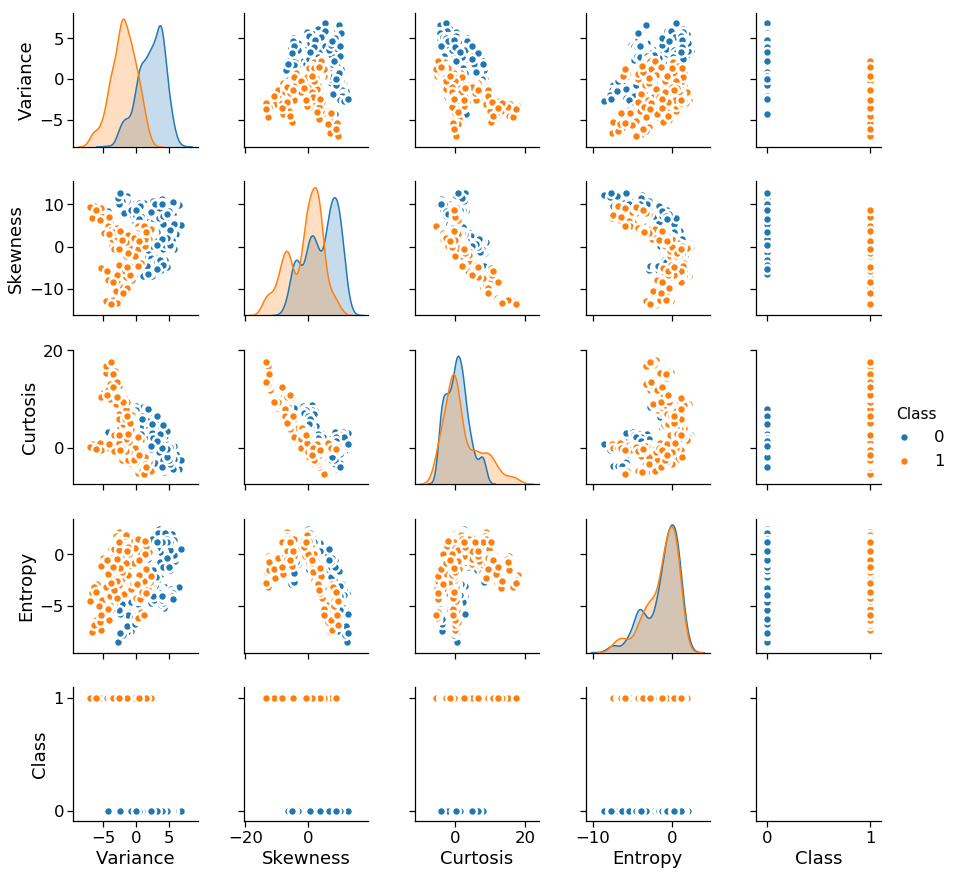

In [107]:
sns.pairplot(bankdata, kind="scatter", hue="Class", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
sns.set_context("notebook", font_scale=2.5)
plt.show()


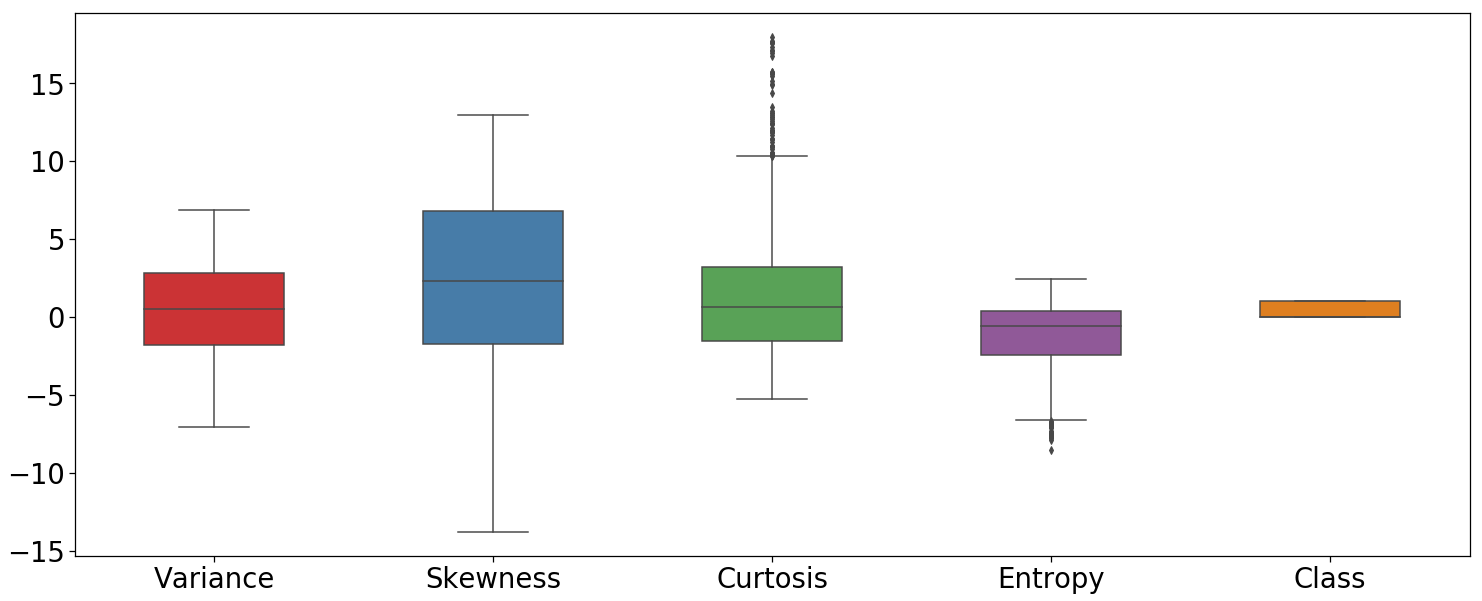

In [108]:
bxplt = sns.boxplot(data=bankdata, palette="Set1", width=0.5)
plt.rcParams['figure.figsize']=(25,10)
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 3.5})
plt.show()

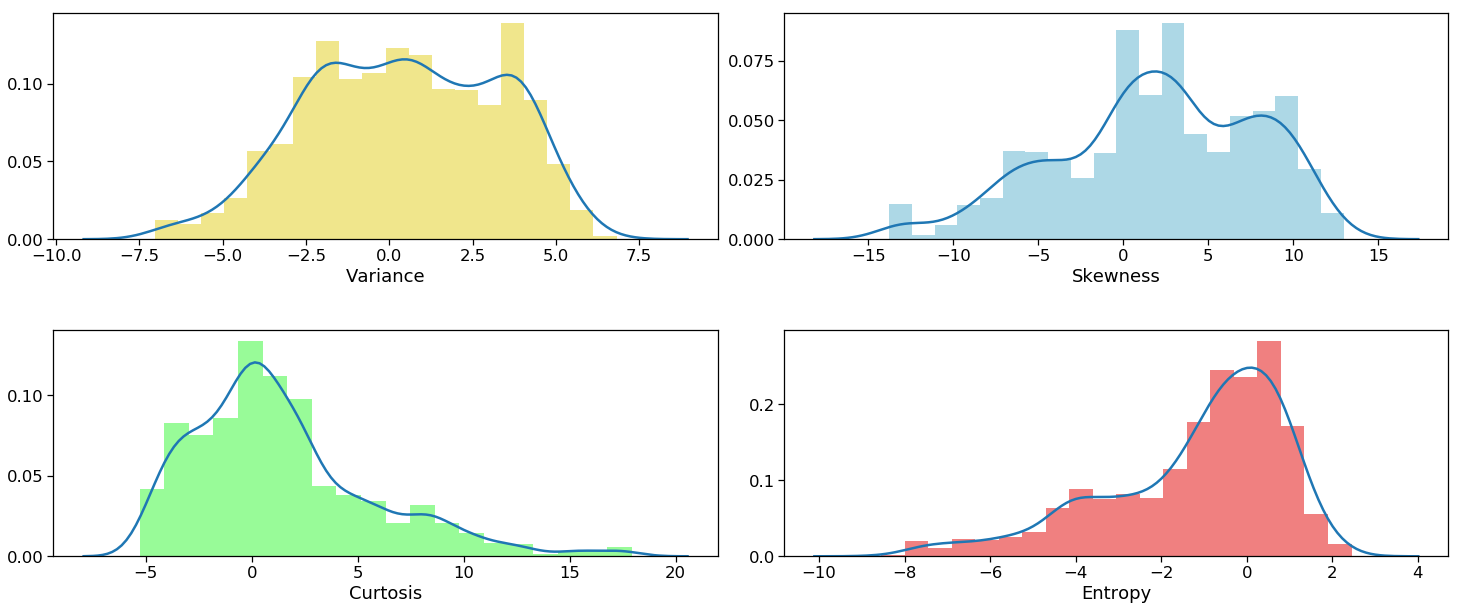

In [97]:
#sns.distplot(bankdata.Variance, bins=20, hist_kws={"alpha": 1, "color": "khaki", "linewidth": 2})

fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.1)

ax = fig.add_subplot(2, 2, 1)
sns.distplot(bankdata.Variance, bins=20, hist_kws={"alpha": 1, "color": "khaki", "linewidth": 2})

ax = fig.add_subplot(2, 2, 2)
sns.distplot(bankdata.Skewness, bins=20, hist_kws={"alpha": 1, "color": "lightblue", "linewidth": 2})

ax = fig.add_subplot(2, 2, 3)
sns.distplot(bankdata.Curtosis, bins=20, hist_kws={"alpha": 1, "color": "palegreen", "linewidth": 2})

ax = fig.add_subplot(2, 2, 4)
sns.distplot(bankdata.Entropy, bins=20, hist_kws={"alpha": 1, "color": "lightcoral", "linewidth": 2})

sns.set_context("notebook", font_scale=2.5, rc={"lines.linewidth": 2.5})
plt.show()

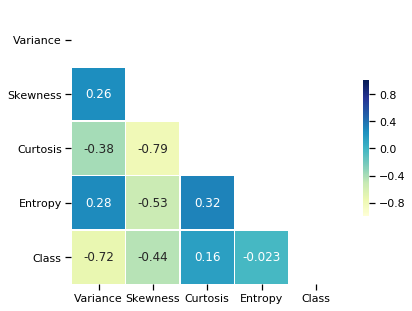

In [137]:
# Compute the correlation matrix
corr = bankdata.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7, 5))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap = "YlGnBu", vmax=1, vmin=-1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

In [161]:
X = bankdata.iloc[:,0:4]
y = bankdata.Class

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [174]:
svcClassifier = SVC(kernel = "linear")
svcClassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [175]:
svcClassifier.score(X_train, y_train)    ## Probably not overfitting

0.9902818270165209

In [177]:
y_pred = svcClassifier.predict(X_test)

In [181]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[193   3]
 [  3 144]]
             precision    recall  f1-score   support

          0       0.98      0.98      0.98       196
          1       0.98      0.98      0.98       147

avg / total       0.98      0.98      0.98       343

